In [78]:
import pandas as pd
import backtrader as bt


df = pd.read_csv('../datasets/individual_stocks_5yr/AAPL_data.csv')

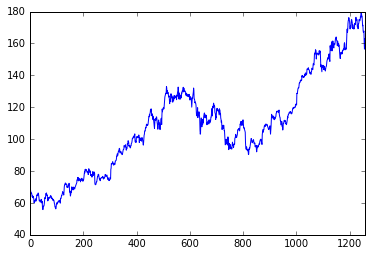

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

df['close'].plot()

In [80]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [81]:
data = bt.feeds.GenericCSVData(
    dataname='../datasets/individual_stocks_5yr/AAPL_data.csv',
    dtformat=('%Y-%m-%d'),
    tmformat=('%H.%M.%S'),
    datetime=0,
    open=1,
    high=2,
    low=3,
    close=4,
    volume=5,
    openinterest=-1)

In [82]:
df.index = pd.DatetimeIndex(df['date'].values)
del df['date']

In [83]:
df.head()

,open,high,low,close,volume,Name
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [84]:
data = bt.feeds.PandasData(dataname=df)

In [85]:
import backtrader.indicators as btind

In [86]:
class FirstStrategy(bt.Strategy):
    params = (
        ('period', 21),
    )
    
    def __init__(self):
        self.startcash = self.broker.getvalue()
        self.rsi = btind.RSI_SMA(self.data.close, period=self.p.period)
        
    def next(self):
        if not self.position:
            if self.rsi < 30:
                self.buy(size=100)
        else:
            if self.rsi > 70:
                self.sell(size=100)
                
    def stop(self):
        pnl = round(self.broker.getvalue() - self.startcash, 2)
        print('RSI Period: {} Final PnL: {}'.format(
            self.params.period, pnl))

In [87]:
from btbot.cerebro import Cerebro

cerebro = Cerebro()
startcash = 100000
cerebro.adddata(data)
cerebro.optstrategy(FirstStrategy, period=range(14, 21))
cerebro.broker.setcash(startcash)
opt_runs = cerebro.run(optreturn=False)

RSI Period: 17 Final PnL: 5858.65
RSI Period: 16 Final PnL: 5823.5
RSI Period: 15 Final PnL: 6306.86
RSI Period: 14 Final PnL: 7089.09
RSI Period: 18 Final PnL: 5015.5
RSI Period: 20 Final PnL: 1076.86
RSI Period: 19 Final PnL: 4702.0


In [50]:
final_results_list = [] 

for run in opt_runs:
    for strategy in run:
        value = round(strategy.broker.get_value(), 2)
        pnl = round(value - startcash)
        period = strategy.params.period
        final_results_list.append([period, pnl])
        
print(final_results_list)

[[14, 7089], [15, 6307], [16, 5824], [17, 5859], [18, 5016], [19, 4702], [20, 1077]]


In [48]:
cerebro.broker.get_value()

100000

In [25]:
def print_trade_analysis(analyzer):
    total_open = analyzer.total.open
    total_closed = analyzer.total.closed
    total_won = analyzer.won.total
    total_lost = analyzer.lost.total
    win_streak = analyzer.streak.won.longest
    lost_streak = analyzer.streak.lost.longest
    pnl_net = round(analyzer.pnl.net.total,2)
    strike_rate = (total_won / total_closed) * 100
    #Designate the rows
    h1 = ['Total Open', 'Total Closed', 'Total Won', 'Total Lost']
    h2 = ['Strike Rate','Win Streak', 'Losing Streak', 'PnL Net']
    r1 = [total_open, total_closed,total_won,total_lost]
    r2 = [strike_rate, win_streak, lost_streak, pnl_net]
    #Check which set of headers is the longest.
    if len(h1) > len(h2):
        header_length = len(h1)
    else:
        header_length = len(h2)
    #Print the rows
    print_list = [h1,r1,h2,r2]
    row_format ="{:<15}" * (header_length + 1)
    print("Trade Analysis Results:")
    for row in print_list:
        print(row_format.format('',*row))
        
def printSQN(analyzer):
    sqn = round(analyzer.sqn,2)
    print('SQN: {}'.format(sqn))

In [26]:
cerebro = Cerebro()
cerebro.adddata(data)
cerebro.addstrategy(FirstStrategy)
cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='ta')
cerebro.addanalyzer(bt.analyzers.SQN, _name='sqn')
cerebro.broker.setcash(10000.0)
strategies = cerebro.run()

In [27]:
print_trade_analysis(strategies[0].analyzers.ta.get_analysis())

Trade Analysis Results:
               Total Open     Total Closed   Total Won      Total Lost     
               0              4              4              4              
               Strike Rate    Win Streak     Losing Streak  PnL Net        
               100.0          4              4              2351.86        


In [28]:
strategies

In [56]:
import backtrader as bt

In [58]:
help(bt.feeds.PandasData)

Help on class PandasData in module backtrader.feeds.pandafeed:

class PandasData(backtrader.feed.DataBase)
 |  Uses a Pandas DataFrame as the feed source, using indices into column
 |  names (which can be "numeric")
 |  
 |  This means that all parameters related to lines must have numeric
 |  values as indices into the tuples
 |  
 |  Params:
 |  
 |    - ``nocase`` (default *True*) case insensitive match of column names
 |  
 |  Note:
 |  
 |    - The ``dataname`` parameter is a Pandas DataFrame
 |  
 |    - Values possible for datetime
 |  
 |      - None: the index contains the datetime
 |      - -1: no index, autodetect column
 |      - >= 0 or string: specific colum identifier
 |  
 |    - For other lines parameters
 |  
 |      - None: column not present
 |      - -1: autodetect
 |      - >= 0 or string: specific colum identifier
 |  
 |  Method resolution order:
 |      PandasData
 |      backtrader.feed.DataBase
 |      backtrader.feed.AbstractDataBase
 |      backtrader.datas